# Regresión Lineal con DataFrame_Commodities

## Verificar la estacionariedad de los datos
Antes de realizar una regresión lineal, es fundamental comprobar si las series temporales son estacionarias. Una serie estacionaria tiene propiedades estadísticas constantes (como media y varianza) a lo largo del tiempo. Si los datos no son estacionarios, los resultados de la regresión pueden ser poco confiables.

¿Cómo Verificar la Estacionariedad?
Usaremos la prueba de Dickey-Fuller aumentada (ADF). La hipótesis nula de esta prueba es que la serie no es estacionaria (tiene una raíz unitaria). Si el p-valor es menor a 0.05, rechazamos la hipótesis nula y concluimos que la serie es estacionaria.

In [1]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_excel('Data_Frame_Commodities.xlsx')
print(df)

           Soya        Zinc       Plata        Oro  Gas Natural  Exportaciones
0     26.315732   14.767585    5.787983   4.002464    65.553808     182.868403
1     33.120706   12.298601    5.351945   2.486342    63.595405     183.123713
2     22.886984   17.369882   11.026101   5.109104    76.450654     214.056343
3     36.149806   19.479514    6.331060   4.173793    82.305499     230.771407
4     49.018702   16.923473    9.447432   2.942544    81.977761     283.191098
..          ...         ...         ...        ...          ...            ...
234  111.510228  134.212232  113.913844  54.299215   145.419014     822.854223
235  113.604871  100.447379  121.421269  39.484441   141.353848     796.156819
236   90.773331  109.833423  125.434717  60.551899   112.592591     770.484390
237   44.836684  150.493252  129.707445  61.191819   106.578740     727.348118
238   43.623023  136.284246  122.805597  29.120758   113.290381     705.747672

[239 rows x 6 columns]


In [3]:
# Definir las columnas a analizar
columns = ['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural', 'Exportaciones']

# Imprimir encabezado
print("Resultados de la prueba ADF para estacionariedad:")

# Iterar sobre cada columna y realizar la prueba ADF
for col in columns:
    # Verificar que la columna existe en el DataFrame
    if col in df.columns:
        # Realizar la prueba ADF
        result = adfuller(df[col])
        p_value = result[1]
        # Imprimir el resultado con el p-valor
        print(f'{col}: p-valor = {p_value:.4f}')
        # Determinar si la serie es estacionaria
        if p_value < 0.05:
            print(f'  -> {col} es estacionaria')
        else:
            print(f'  -> {col} no es estacionaria y necesita transformación')
    else:
        print(f'La columna {col} no se encuentra en el DataFrame.')

Resultados de la prueba ADF para estacionariedad:
Soya: p-valor = 0.1581
  -> Soya no es estacionaria y necesita transformación
Zinc: p-valor = 0.1073
  -> Zinc no es estacionaria y necesita transformación
Plata: p-valor = 0.3089
  -> Plata no es estacionaria y necesita transformación
Oro: p-valor = 0.2893
  -> Oro no es estacionaria y necesita transformación
Gas Natural: p-valor = 0.2763
  -> Gas Natural no es estacionaria y necesita transformación
Exportaciones: p-valor = 0.1354
  -> Exportaciones no es estacionaria y necesita transformación


### Transformar las series utilizando la técnica de diferenciación

In [4]:
df_diff = df[columns].diff().dropna()

# Verificar nuevamente la estacionariedad en las series diferenciadas
print("\nResultados de la prueba ADF tras diferenciación:")
for col in columns:
    result = adfuller(df_diff[col])
    p_value = result[1]
    print(f'{col}: p-valor = {p_value:.4f}')
    if p_value < 0.05:
        print(f'  -> {col} ahora es estacionaria')
    else:
        print(f'  -> {col} aún no es estacionaria (considera otra transformación)')


Resultados de la prueba ADF tras diferenciación:
Soya: p-valor = 0.0030
  -> Soya ahora es estacionaria
Zinc: p-valor = 0.0000
  -> Zinc ahora es estacionaria
Plata: p-valor = 0.0000
  -> Plata ahora es estacionaria
Oro: p-valor = 0.0000
  -> Oro ahora es estacionaria
Gas Natural: p-valor = 0.0085
  -> Gas Natural ahora es estacionaria
Exportaciones: p-valor = 0.0000
  -> Exportaciones ahora es estacionaria


## Realizamos la Regresión lineal Multivariante
Con las series estacionarias, ajustaremos un modelo de regresión lineal donde la variable dependiente es 'Exportaciones' y las variables independientes son 'Soya', 'Zinc', 'Plata', 'Oro' y 'Gas Natural'. 
El modelo se expresa de la siguiente manera:

Exportaciones=β 
0
​
 +β 
1
​
 ⋅Soya+β 
2
​
 ⋅Zinc+β 
3
​
 ⋅Plata+β 
4
​
 ⋅Oro+β 
5
​
 ⋅Gas Natural+ϵ

In [5]:
import statsmodels.api as sm

# Definir variables independientes (X) y dependiente (y)
# Usar df o df_diff según corresponda después de verificar estacionariedad
data_to_use = df_diff  # Cambia a 'df' si las series originales ya eran estacionarias
X = data_to_use[['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural']]
y = data_to_use['Exportaciones']

# Añadir una constante para el intercepto
X = sm.add_constant(X)

# Ajustar el modelo de regresión
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Exportaciones   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     383.1
Date:                Thu, 27 Feb 2025   Prob (F-statistic):          6.35e-110
Time:                        15:16:00   Log-Likelihood:                -1099.9
No. Observations:                 238   AIC:                             2212.
Df Residuals:                     232   BIC:                             2233.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3664      1.616      0.227      

# Análisis de los Resultados:
## Modelo Realizado: Mínimos Cuadrados Ordinarios

El modelo indica las siguientes variables: 
'Exportaciones' como variable dependiente. Esto significa que el modelo predice el valor de las exportaciones basado en las variables independientes (Soya, Zinc, Plata, Oro, Gas Natural).


\R Cuadrado : 0.892  -->  el 89.2% de la variabilidad en las exportciones es explicada por las variables independientes, lo que indica un buen ajuste del modelo y la confirmación de que son los 5 Productos, tanto tradicionales como no tradicionales, más influyentes en las exportaciones.

\R Cuadrado ajustado: 0.890  --> Similar al R-cuadrado, pero ajustado por el número de variables, confirmando que el modelo sigue siendo sólido.

\F-statistic: 383.1 con un p-valor de 6.35e-110. Esto indica que el modelo, en su conjunto, es estadísticamente significativo (p<0.05), es decir, las variables independientes tienen un impacto relevante en las exportaciones.

## Coeficientes de las variables independientes

\Constante (intercepto): 0.3664 con un valor p de 0.821 (No es significativo(p>0.05)), lo cual significa que cuando todas las varibales independientes son cero, las exportaciones no tienen un valor base significativo. Existe lógica en el resultado.

\Soya: 1.1196, p-valor = 0.000. Por cada unidad de aumento en Soya, las exportaciones aumentan en 1.1196 unidades, y es altamente significativo.

\Zinc: 1.1376, p-valor = 0.000. Por cada unidad de aumento en Zinc, las exportaciones aumentan en 1.1376 unidades, y es altamente significativo.

\Plata: 1.6744, p-valor = 0.000. Por cada unidad de aumento en Plata, las exportaciones aumentan en 1.6744 unidades, tiene el mayor impacto.

\Oro: 1.0760, p-valor = 0.000. Por cada unidad de aumento en Oro, las exportaciones aumentan en 1.0760 unidades.

\Gas Natural: 1.1545, p-valor = 0.000. Por cada unidad de aumento en Gas Natural, las exportaciones aumentan 1.1545 unidades

## Standard Error
\Soya: 0.065 --> El error estándar es más bajo que el de la Plata, siendo el coeficiente de la Soya mucho más preciso que el de la Plata.

\Zinc: 0.108 --> Mayor incentidumbre en comparación a la soya

\Plata:0.136 --> Mayor incentidumbre en comparación a la Soya

\Oro: 0.057

\Gas Natural: 0.056

## 📊Intérvalos de Confianza
Los intérvalos de confianza proporcionan un rango dentro del cual, con un 95% de confianza, se encuentra el verdadero valor del coeficiente.

Esto mide la incertidumbre en la estimación.

\Soya = [0.991   -    1.248]
\Zinc = [0.924   -    1.351]
\Plata = [1.407  -     1.942]
\Oro = [0.963    -   1.189]
\Gas Natural = [1.044   -    1.265]

##Visualizando
| Materia Prima  | Coeficiente Mínimo | Coeficiente Máximo |
|---------------|--------------|--------------|
| **Soya**      | 0.991        | 1.248        |
| **Zinc**      | 0.924        | 1.351        |
| **Plata**     | 1.407        | 1.942        |
| **Oro**       | 0.963        | 1.189        |
| **Gas Natural** | 1.044      | 1.265        |

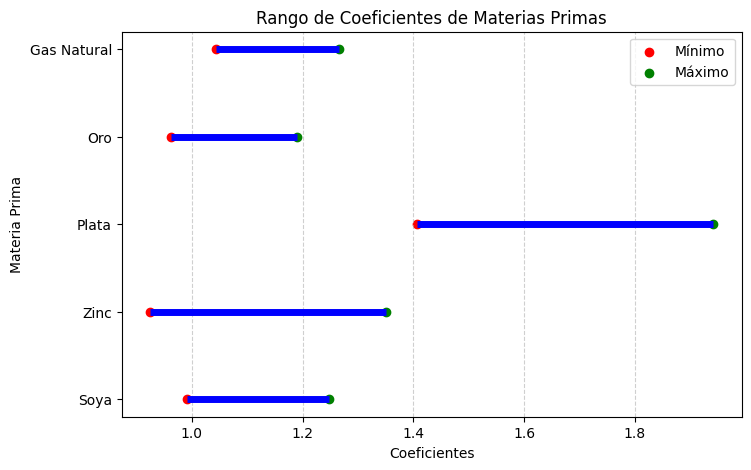

In [6]:
import matplotlib.pyplot as plt

# Datos
materias_primas = ["Soya", "Zinc", "Plata", "Oro", "Gas Natural"]
coeficiente_min = [0.991, 0.924, 1.407, 0.963, 1.044]
coeficiente_max = [1.248, 1.351, 1.942, 1.189, 1.265]

# Crear gráfico de barras de rangos
plt.figure(figsize=(8, 5))
plt.hlines(materias_primas, coeficiente_min, coeficiente_max, colors='blue', lw=5)
plt.scatter(coeficiente_min, materias_primas, color='red', label="Mínimo")
plt.scatter(coeficiente_max, materias_primas, color='green', label="Máximo")

# Etiquetas y título
plt.xlabel("Coeficientes")
plt.ylabel("Materia Prima")
plt.title("Rango de Coeficientes de Materias Primas")
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Mostrar gráfico
plt.show()


In [7]:
# Demostrando los rangos
materias_primas = ["Soya", "Zinc", "Plata", "Oro", "Gas Natural"]
coeficiente_min = [0.991, 0.924, 1.407, 0.963, 1.044]
coeficiente_max = [1.248, 1.351, 1.942, 1.189, 1.265]

# Calcular los rangos
rangos = [maximo - minimo for maximo, minimo in zip(coeficiente_max, coeficiente_min)]

# Encontrar el rango más corto
rango_minimo = min(rangos)
indice_rango_minimo = rangos.index(rango_minimo)
materia_prima_minima = materias_primas[indice_rango_minimo]

#Mostrar los resultados
print("Rangos de coeficientes de materias primas:")
for materia, minimo, maximo, rango in zip(materias_primas, coeficiente_min, coeficiente_max, rangos):
    print(f"{materia}: {maximo:.3f} - {minimo:.3f} = {rango:.3f}")

Rangos de coeficientes de materias primas:
Soya: 1.248 - 0.991 = 0.257
Zinc: 1.351 - 0.924 = 0.427
Plata: 1.942 - 1.407 = 0.535
Oro: 1.189 - 0.963 = 0.226
Gas Natural: 1.265 - 1.044 = 0.221


# Diagnóstico del modelo
### Omnibus

\Omnibus: 0.860 
\ Prob (omnibus): 0.650

Esto indica que no hay evidencia suficiente para rechazar la normalidad del modelo debido a que el valor p > 0.05, sugiere que los residuos son aproximadamente normales.

\Durbin Watson: 2.659

Debido a que el resultado es mayor a 2, sugiere que existe una leve indicación de autocorrelación positiva en los residuos, lo que podría ser problemático.

\Jarque - Bera: 0.622
\Prob(JB): 0.733

Con un p-valor > 0.05, no hay evidencia de que los residuos no sean normales. Esto refuerza mi resultado del Omnibus aproximando a que los residuos si son normales.

\Skew: -0.109

Los residuos indican una leve asimetría negativa, sin embargo no es significativo debido a que el valor es cercano a 0. Respalda la normalidad de los residuos.

\Kurtosis: 3.121

El resultado indica que la concentración de los residuos en las colas de la distribución demuestran una leptocurtosis. Sin embargo es un ligero aumento de la distribución normal, es aceptable para el modelo.

\Condition Number: 30.1
El valor es superior a 30, lo cual indica una multicolinealidad severa entre las variables independientes, por lo tanto podría sugerir que los coeficientes son inestables. 


In [8]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Asegurarse si existe multicolinealidad

# Definir las columnas de las variables independientes (excluyendo 'Exportaciones' si es la dependiente)
independent_vars = ['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural']

# Verificar que las columnas existan en df_diff
for col in independent_vars:
    if col not in df_diff.columns:
        print(f"Error: La columna {col} no está en df_diff. Verifica las columnas disponibles:")
        print(df_diff.columns)
        exit()

# Crear un DataFrame con las variables independientes
X = df_diff[independent_vars]

# Añadir una constante (intercepto) para el modelo de regresión
X = sm.add_constant(X)

# Calcular el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Imprimir los resultados
print("Factores de Inflación de la Varianza (VIF):")
print(vif_data)

# Interpretación adicional
print("\nInterpretación:")
print("VIF < 5: Multicolinealidad baja o inexistente.")
print("VIF entre 5 y 10: Multicolinealidad moderada, considerarlo.")
print("VIF > 10: Multicolinealidad severa, ajustar el modelo (por ejemplo, eliminar variables).")

Factores de Inflación de la Varianza (VIF):
      Variable       VIF
0        const  1.001728
1         Soya  1.028528
2         Zinc  1.262277
3        Plata  1.220988
4          Oro  1.055625
5  Gas Natural  1.020981

Interpretación:
VIF < 5: Multicolinealidad baja o inexistente.
VIF entre 5 y 10: Multicolinealidad moderada, considerarlo.
VIF > 10: Multicolinealidad severa, ajustar el modelo (por ejemplo, eliminar variables).


## ¿Existe Multicolinealidad?
No, al realizar el cálculo de los Factores de Inflación de la Varianza (VIF), podemos observar que ningún producto supera el parámetro para considerarse la Multicolinealidad. Por lo tanto, no existe multicolinealidad significativa entre las variables independientes en el DataFrame. Los VIF bajos son una indicación confiable de que la Soya, Zinc, Plata, Oro y Gas Natural no están correlacionadas de manera problemática.

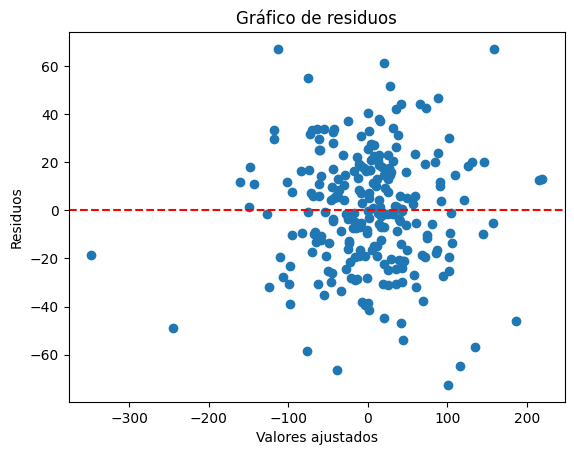

In [9]:
import matplotlib.pyplot as plt

residuos = model.resid
plt.scatter(model.fittedvalues, residuos)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos')
plt.show()

# Gráficas: 
## Histograma de Residuos
Muestra la distribución de los residuos (Diferencias entre los valores observados y predichos).

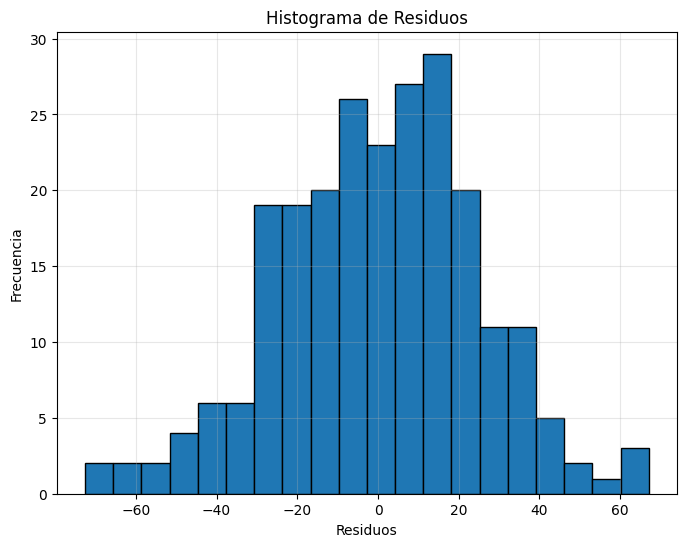

In [10]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Asegúrate de que 'model' esté definido (ajusta tu modelo OLS con df_diff)
X = sm.add_constant(df_diff[['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural']])
y = df_diff['Exportaciones']
model = sm.OLS(y, X).fit()

# Obtener los residuos
residuals = model.resid

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histograma de Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)
plt.show()

## Q-Q Plot de Residuos
El gráfico Quantile-Quantile compara los cuantiles de los residuos con los cuantiles de una distibución normal teórica. De esta manera evaluamos yd demostramos la normalidad de los residuos. 

<Figure size 800x600 with 0 Axes>

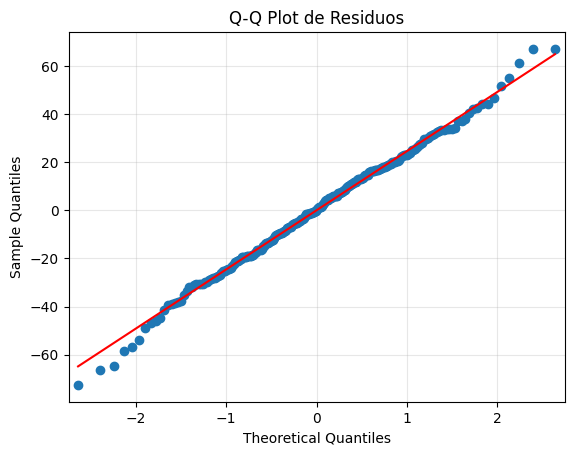

In [11]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Asegúrate de que 'model' esté definido (ajusta tu modelo OLS con df_diff)
X = sm.add_constant(df_diff[['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural']])
y = df_diff['Exportaciones']
model = sm.OLS(y, X).fit()

# Obtener los residuos
residuals = model.resid

# Crear el Q-Q plot
plt.figure(figsize=(8, 6))
sm.qqplot(residuals, line='s')  # 's' ajusta la línea a los cuantiles de la muestra
plt.title('Q-Q Plot de Residuos')
plt.grid(True, alpha=0.3)
plt.show()

## Gráfico de Residuos vs. Valores Ajustados
Con el siguiente gráfico demostramos los residuos en función de los valores predichos (ajustados) por el modelo. El objetivo es verificar la homocedasticidad (varianza constante de los residuos) y la linealidad.

Objetivo: 
Los puntos deben estar dispersos aleatoriamente alrededor de cero sin patrones (como un cono o dispersión creciente).

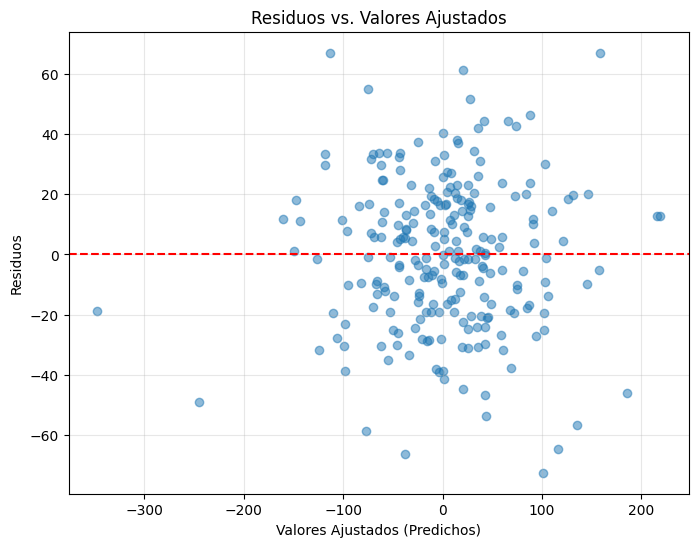

In [12]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Asegúrate de que 'model' esté definido (ajusta tu modelo OLS con df_diff)
X = sm.add_constant(df_diff[['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural']])
y = df_diff['Exportaciones']
model = sm.OLS(y, X).fit()

# Obtener residuos y valores ajustados
residuals = model.resid
fitted_values = model.fittedvalues

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.scatter(fitted_values, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados (Predichos)')
plt.ylabel('Residuos')
plt.title('Residuos vs. Valores Ajustados')
plt.grid(True, alpha=0.3)
plt.show()

## Gráfico de Barras de Coeficientes
Nos permite comparar la magnitud e impacto relativo en la variable dependiente. Apoyando el rango de coeficientes que hemos calculado previamente.

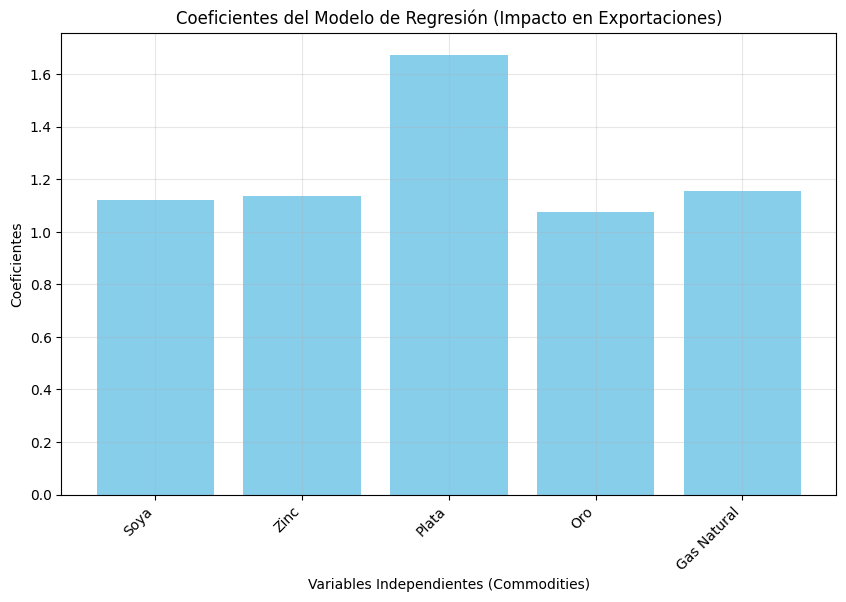

In [13]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd

# Asegúrate de que 'model' esté definido (ajusta tu modelo OLS con df_diff)
X = sm.add_constant(df_diff[['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural']])
y = df_diff['Exportaciones']
model = sm.OLS(y, X).fit()

# Crear un DataFrame con los coeficientes (excluyendo la constante)
coef_df = pd.DataFrame({'Variable': X.columns[1:], 'Coeficiente': model.params[1:]})

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(coef_df['Variable'], coef_df['Coeficiente'], color='skyblue')
plt.title('Coeficientes del Modelo de Regresión (Impacto en Exportaciones)')
plt.xlabel('Variables Independientes (Commodities)')
plt.ylabel('Coeficientes')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.show()

## Matriz de Correlación
Hemos verificado que no existe multicolinealidad en el modelo, y la siguiente matriz es útil para presentar la relación entre variables independientes.

Parámetros a seguir: 

Valores cercanos a 1 o -1 = alta correlación positiva o negativa.

Valores cercanos a 0 = baja correlación (Ausencia de Multicolinealidad)

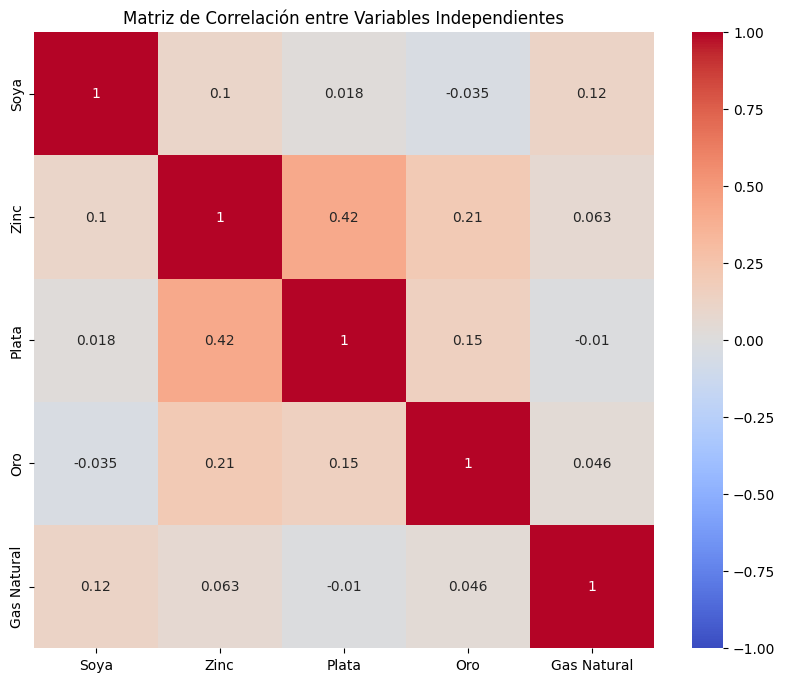

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las variables independientes
correlation_data = df_diff[['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural']]

# Crear la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación entre Variables Independientes')
plt.show()

##############################################################################

# Diferencias entre la Soya y la Plata

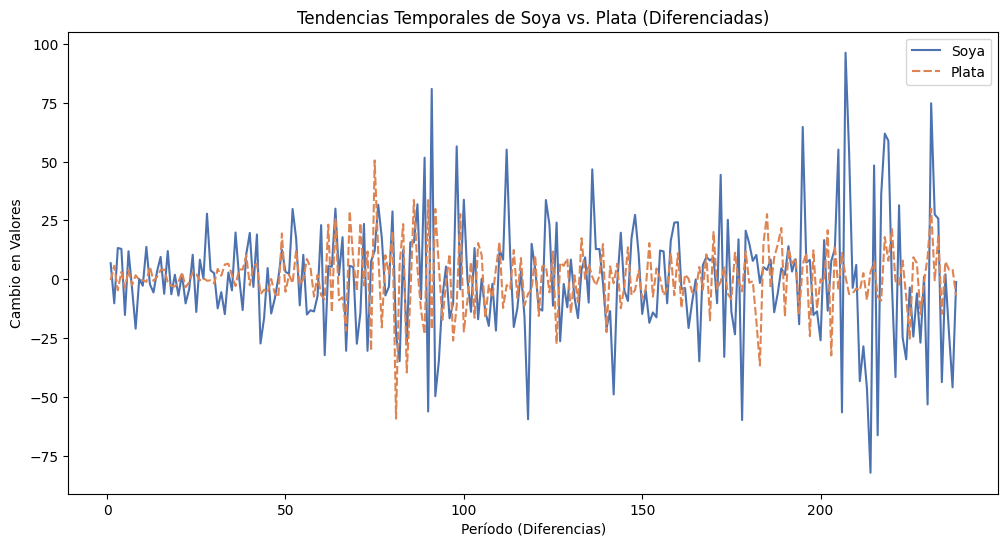

             Soya       Plata
count  238.000000  238.000000
mean     0.072720    0.491671
std     25.188045   13.172270
min    -82.228528  -59.253781
25%    -13.820380   -6.147550
50%      0.157621   -0.148231
75%     12.549657    7.277469
max     96.237639   50.480516


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df_diff ya está definido
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_diff[['Soya', 'Plata']], palette='deep')
plt.title('Tendencias Temporales de Soya vs. Plata (Diferenciadas)')
plt.xlabel('Período (Diferencias)')
plt.ylabel('Cambio en Valores')
plt.show()

print(df_diff[['Soya', 'Plata']].describe())

# Modelo VAR (Vector Autoregressive)

## Este modelo realiza múltiples series temporales interdependientes, ideal para analizar cómo la soya y otros Commodities interactúan entre sí y con las exportaciones a lo largo del tiempo

In [16]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Seleccionar variables relevantes (excluyendo la constante)
var_data = df_diff[['Soya', 'Zinc', 'Plata', 'Oro', 'Gas Natural', 'Exportaciones']]
model_var = VAR(var_data)

# Determinar el número óptimo de rezagos usando criterios de información
lag_order = model_var.select_order(maxlags=5)
print(lag_order.summary())

# Ajustar el modelo con el número óptimo de rezagos
results_var = model_var.fit(lag_order.aic)
print(results_var.summary())

 VAR Order Selection (* highlights the minimums) 
      AIC         BIC         FPE         HQIC   
-------------------------------------------------
0       36.98      37.07*   1.151e+16       37.02
1       36.55       37.17   7.465e+15      36.80*
2      36.50*       37.65  7.106e+15*       36.96
3       36.52       38.21   7.273e+15       37.20
4       36.60       38.82   7.863e+15       37.49
5       36.64       39.40   8.273e+15       37.75
-------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 27, Feb, 2025
Time:                     15:18:06
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    37.5846
Nobs:                     236.000    HQIC:                   36.9012
Log likelihood:          -6231.11    FPE:                6.69689e+15
AIC:                      36.4397    Det(Omega_ml

C:\Users\nicol\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
